<a href="https://colab.research.google.com/github/cedjustin/AI/blob/master/sprint18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [24]:
batch_size = 2
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [26]:
image_generator = ImageDataGenerator(rescale=1./255)

In [33]:
gen_train = image_generator.flow_from_directory(batch_size=batch_size,
                                          directory="drive/MyDrive/dataset/",
                                          shuffle=True,
                                          target_size=(IMG_HEIGHT, IMG_WIDTH),
                                          class_mode='binary')

Found 8 images belonging to 2 classes.


In [70]:
train_data, _ = next(gen_train)

In [66]:
import matplotlib.pyplot as plt

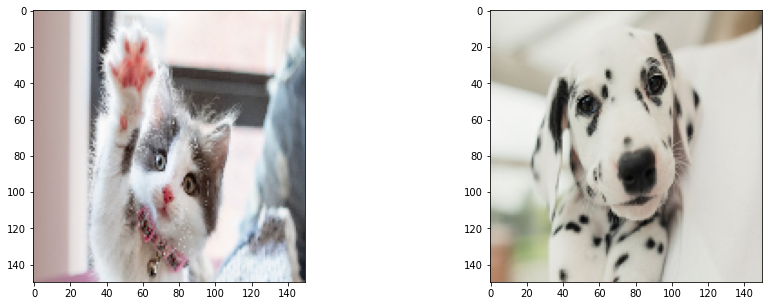

In [71]:
plt.figure(figsize=(15,5))
for i in range(len(train_data)):
    plt.subplot(1, 2, i+1)
    plt.imshow(train_data[i])

[Problem 1] Learning classification with self-made dataset